In [1]:
# importing libraries that we will need
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('dataset.csv');
data.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


# Getting data that we're interested in for further review
35% of these accidents occur in Texas. Most States don't have over 5% or even over 2% share of them.

In [3]:
#number of spill totals by state
spillsPerState = data['Accident State'].value_counts(normalize=True).sort_values(ascending=False);
spillsPerStateVol = data['Accident State'].value_counts();

#property damage totals by state
propertyDamage = data.groupby('Accident State')['Property Damage Costs'].sum().sort_values(ascending=False);

#fatality totals by state
fatalityTotals = data.groupby('Accident State')['All Fatalities'].sum().sort_values(ascending=False);

#'Environmental Remediation Costs' totals by state
EnvironRemedCosts = data.groupby('Accident State')['Environmental Remediation Costs'].sum().sort_values(ascending=False);

all = [spillsPerState, propertyDamage, fatalityTotals, EnvironRemedCosts];
bdf = pd.concat(all, axis=1).sort_values(by='Accident State', ascending=False)
bdf

,Accident State,Property Damage Costs,All Fatalities,Environmental Remediation Costs
TX,0.360762,57246318.0,3.0,70080403.0
OK,0.084801,10212737.0,NaN,19918292.0
LA,0.060726,53402564.0,1.0,10700866.0
CA,0.054977,20376668.0,NaN,37153144.0
KS,0.053899,3526302.0,NaN,9378124.0
IL,0.038807,14927457.0,2.0,46260661.0
WY,0.035214,1120080.0,NaN,2620217.0
NJ,0.030543,3185475.0,NaN,2527742.0
MN,0.021200,4609727.0,NaN,4041413.0
NM,0.020481,1697794.0,NaN,1613164.0


Most states have less than 5% of all spills

# Which States have more spills than their share?

In [4]:
spillsPerState[spillsPerState > .02].sort_values()


IN    0.020481
NM    0.020481
MN    0.021200
NJ    0.030543
WY    0.035214
IL    0.038807
KS    0.053899
CA    0.054977
LA    0.060726
OK    0.084801
TX    0.360762
Name: Accident State, dtype: float64

Looking at the number of spills in any state except texas:

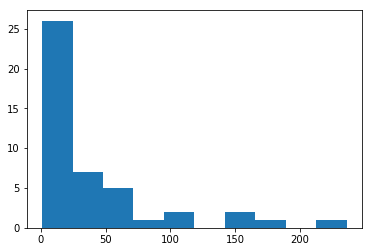

In [5]:
plt.hist(spillsPerStateVol.drop('TX')); plt.show();

# Cost of spills in Texas vs in other states

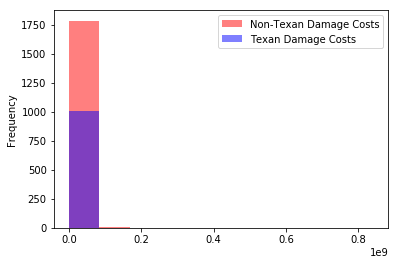

Texan Damage costs:
count    1.004000e+03
mean     1.840172e+05
std      7.600651e+05
min      0.000000e+00
25%      3.995500e+03
50%      1.939150e+04
75%      7.000375e+04
max      1.123570e+07
Name: All Costs, dtype: float64

Non-Texan Damage costs:
count    1.791000e+03
mean     1.198420e+06
std      2.069547e+07
min      0.000000e+00
25%      5.541500e+03
50%      2.605000e+04
75%      1.496755e+05
max      8.405261e+08
Name: All Costs, dtype: float64

Ratios, non-texan / texan
count     1.783865
mean      6.512541
std      27.228551
min            NaN
25%       1.386935
50%       1.343372
75%       2.138107
max      74.808529
Name: All Costs, dtype: float64


In [6]:
norm = lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x));
TexasDamages = data[data['Accident State'] == 'TX']['All Costs'].sort_values().dropna();
NTexasDamages = data[data['Accident State'] != 'TX']['All Costs'].dropna();
dmg = pd.DataFrame({'Texan Damage Costs': TexasDamages, 'Non-Texan Damage Costs' : NTexasDamages})
dmg.plot.hist(alpha=.5, color=["red", "blue"]);
plt.show();
print("Texan Damage costs:")
print(TexasDamages.describe())
print();
print("Non-Texan Damage costs:")
print(NTexasDamages.describe())
print();
print("Ratios, non-texan / texan")
print(NTexasDamages.describe()/TexasDamages.describe())

# Cost of spills by company

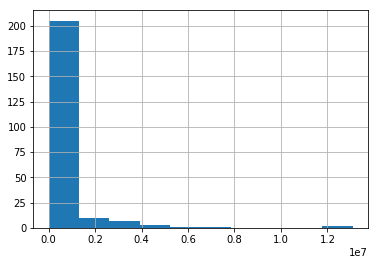

Raw # of spills by company
ENTERPRISE CRUDE PIPELINE LLC          195
SUNOCO PIPELINE L.P.                   180
PLAINS PIPELINE, L.P.                  156
ENTERPRISE PRODUCTS OPERATING LLC      155
MAGELLAN PIPELINE COMPANY, LP          140
COLONIAL PIPELINE CO                   136
BUCKEYE PARTNERS, LP                   115
MARATHON PIPE LINE LLC                  87
KINDER MORGAN LIQUID TERMINALS, LLC     87
PHILLIPS 66 PIPELINE LLC                80
Name: Operator Name, dtype: int64

Normed # of spills by company
ENTERPRISE CRUDE PIPELINE LLC          0.069767
SUNOCO PIPELINE L.P.                   0.064401
PLAINS PIPELINE, L.P.                  0.055814
ENTERPRISE PRODUCTS OPERATING LLC      0.055456
MAGELLAN PIPELINE COMPANY, LP          0.050089
COLONIAL PIPELINE CO                   0.048658
BUCKEYE PARTNERS, LP                   0.041145
MARATHON PIPE LINE LLC                 0.031127
KINDER MORGAN LIQUID TERMINALS, LLC    0.031127
PHILLIPS 66 PIPELINE LLC               0.02862

In [7]:
spillsByCompany = data['Operator Name'].value_counts();
spillsByCompanyNormed = data['Operator Name'].value_counts(normalize=True)
damagesByCompanyMeans = data.groupby('Operator Name')['All Costs'].mean().sort_values(ascending=False)
damagesByCompanyMeans.hist();
plt.show()
print("Raw # of spills by company");
print(spillsByCompany.head(10))
print()
print("Normed # of spills by company")
print(spillsByCompanyNormed.head(10))
print()
print("Mean costs by company")
print(damagesByCompanyMeans.head(10))

Time Dependancy
We'll focus on a few things here:

Course time-dependency (as a function of year)
Look into the details a bit, month-by-month

In [8]:
# Some calculations to plot distributions by year

headers = ['Accident Year','All Costs','Property Damage Costs',
           'Lost Commodity Costs','Public/Private Property Damage Costs',
           'Emergency Response Costs','Environmental Remediation Costs', 'Other Costs']
data_forPlots = data[headers]
data_forPlots = data_forPlots[data_forPlots['Accident Year'] != 2017]
by_year = data_forPlots.groupby('Accident Year')

xPt = by_year.sum()['All Costs'].index.values
yAll_sum = by_year.sum()['All Costs'].values
yPro_sum = by_year.sum()['Property Damage Costs'].values
yCom_sum = by_year.sum()['Lost Commodity Costs'].values
yPri_sum = by_year.sum()['Public/Private Property Damage Costs'].values
yEme_sum = by_year.sum()['Emergency Response Costs'].values
yEnv_sum = by_year.sum()['Environmental Remediation Costs'].values

fracProp = by_year.mean()['Property Damage Costs'].values / by_year.mean()['All Costs'].values
fracComm = by_year.mean()['Lost Commodity Costs'].values / by_year.mean()['All Costs'].values
fracPriP = by_year.mean()['Public/Private Property Damage Costs'].values / by_year.mean()['All Costs'].values
fracEmer = by_year.mean()['Emergency Response Costs'].values / by_year.mean()['All Costs'].values
fracEnvi = by_year.mean()['Environmental Remediation Costs'].values / by_year.mean()['All Costs'].values

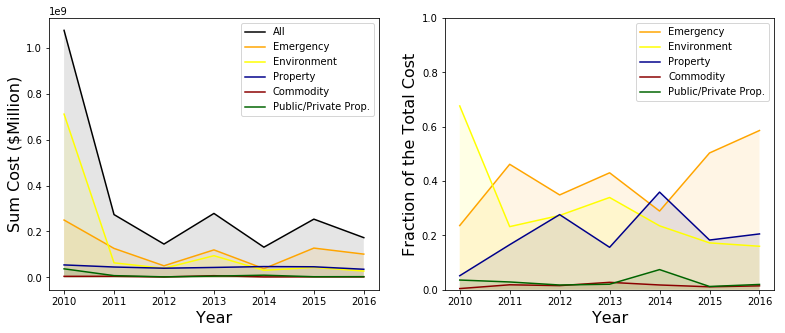

In [9]:
# Year-by-year plot

f, a = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

a[0].plot(xPt, yAll_sum, label="All", color='black')
a[0].plot(xPt, yEme_sum,label="Emergency", color='orange')
a[0].plot(xPt, yEnv_sum,label="Environment", color='yellow')
a[0].plot(xPt, yPro_sum,label="Property", color='darkblue')
a[0].plot(xPt, yCom_sum,label="Commodity", color='darkred')
a[0].plot(xPt, yPri_sum,label="Public/Private Prop.", color='darkgreen')
a[0].fill_between(xPt, yAll_sum, 10E0, facecolor='black', alpha=0.1)
a[0].fill_between(xPt, yPro_sum, 10E0, facecolor='darkblue', alpha=0.1)
a[0].fill_between(xPt, yCom_sum, 10E0, facecolor='darkred', alpha=0.1)
a[0].fill_between(xPt, yPri_sum, 10E0, facecolor='darkgreen', alpha=0.1)
a[0].fill_between(xPt, yEme_sum, 10E0, facecolor='orange', alpha=0.1)
a[0].fill_between(xPt, yEnv_sum, 10E0, facecolor='yellow', alpha=0.1)
a[0].get_xaxis().get_major_formatter().set_useOffset(False)
a[0].set_xlabel('Year', fontsize=16)
a[0].set_ylabel('Sum Cost ($Million)', fontsize=16)
a[0].legend()


a[1].plot(xPt, fracEmer,label="Emergency", color='orange')
a[1].plot(xPt, fracEnvi,label="Environment", color='yellow')
a[1].plot(xPt, fracProp,label="Property", color='darkblue')
a[1].plot(xPt, fracComm,label="Commodity", color='darkred')
a[1].plot(xPt, fracPriP,label="Public/Private Prop.", color='darkgreen')
a[1].fill_between(xPt, fracProp, 0, facecolor='darkblue', alpha=0.1)
a[1].fill_between(xPt, fracComm, 0, facecolor='darkred', alpha=0.1)
a[1].fill_between(xPt, fracPriP, 0, facecolor='darkgreen', alpha=0.1)
a[1].fill_between(xPt, fracEmer, 0, facecolor='orange', alpha=0.1)
a[1].fill_between(xPt, fracEnvi, 0, facecolor='yellow', alpha=0.1)
a[1].get_xaxis().get_major_formatter().set_useOffset(False)
a[1].set_xlabel('Year', fontsize=16)
a[1].set_ylabel('Fraction of the Total Cost', fontsize=16)
a[1].set_ylim([0,1])
tmp = a[1].legend()

The left plot shows the summed cost of all the pipeline spills year-by-year for the data given. Summed cost is shown as the total ('All') spill costs as well as the major breakdowns given in the data.

Some immediate takeaways:

2010 was a stand-out year with about 5 times the total expenses incurred

The cost is largely dominated by environmental + emergency clean-up costs. Property is the next highest factor hovering at around ~20% of the cost for any given year. 2014 is an outlier year where the total property costs incurred a highest singular fraction.